In [1]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np


cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

In [2]:
image_path = "./images/"

In [3]:
images_list = os.listdir(image_path)
images_list

['20230109_171910.jpg',
 '20230109_171922.jpg',
 '20230109_171941.jpg',
 '20230109_171951.jpg',
 '20230109_172007.jpg',
 '20230109_172038.jpg']

## Opening Images

In [4]:
images = []
gray_images = []
for image in images_list:
    print(image)
    img = cv2.imread(image_path + image)
    resized = cv2.resize(img, (512, 512), interpolation=cv2.INTER_AREA)
    images.append(resized)
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    gray_images.append(gray)

print(images[0].shape)
print(gray_images[0].shape)

20230109_171910.jpg
20230109_171922.jpg
20230109_171941.jpg
20230109_171951.jpg
20230109_172007.jpg
20230109_172038.jpg
(512, 512, 3)
(512, 512)


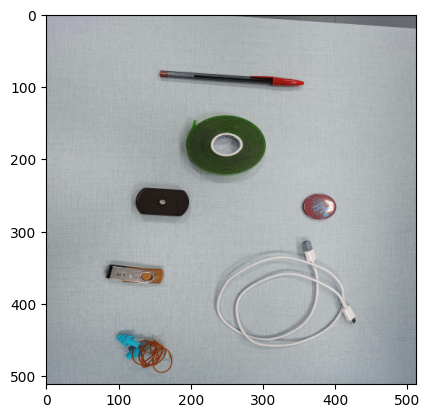

In [5]:
plt.imshow(images[0])

In [6]:
def show(images):
    # n = len(images)
    # fig = plt.figure(figsize=(15, 15))
    # columns = 2
    # rows = round(n/2)
    # for i in range(len(images)):
    #     img = images[i-1]
    #     fig.add_subplot(rows, columns, i+1)
    #     plt.imshow(img, cmap="gray")
    #     plt.title(images_list[i])
    # plt.show()

    rows = round(len(images)/2)
    fig, axs = plt.subplots(2, rows,figsize=(10, 10))
    c = 0
    for i in range(rows):
        for j in range(2):
            img = images[2 * i + j]
            axs[j][i].imshow(img)
            axs[j][i].set_title(images_list[c])
            c += 1

    plt.show()

def show_counting(images):
    rows = round(len(images)/2)
    fig, axs = plt.subplots(2, row,figsize=(10, 10))
    c = 0
    for i in range(rows):
        for j in range(2):
            img = images[2 * i + j]
            boxes = objects_2[c]
            axs[j][i].imshow(img)
            axs[j][i].set_title(f"objects: {len(boxes)}")
            for box in boxes:
                axs[i][j].add_patch(box)

    # axs.set_axis_off()

    plt.show()


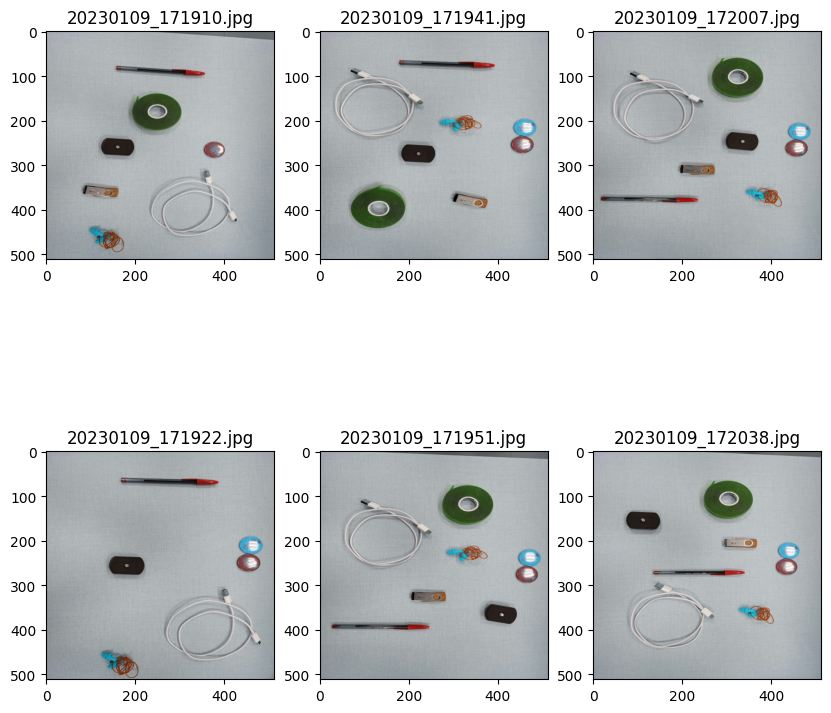

In [7]:
img = images[0]
show(images)

## Denoising images

In [8]:
from skimage import io
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float


In [9]:
def denoise(img):
    float_img = img_as_float(img)
    sigma_est = np.mean(estimate_sigma(img, channel_axis=-1))
    denoise_img = denoise_nl_means(float_img, h=1.15 * sigma_est, fast_mode=True, 
                               patch_size=5, patch_distance=3, channel_axis=-1)
    denoise_img_as_8byte = img_as_ubyte(denoise_img)
    # gray = cv2.cvtColor(denoise_img_as_8byte, cv2.COLOR_BGR2GRAY)
    return denoise_img_as_8byte
    

In [10]:
denoised = denoise(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_denoised = cv2.cvtColor(denoised, cv2.COLOR_BGR2GRAY)


Text(0.5, 1.0, 'Gray denoised')

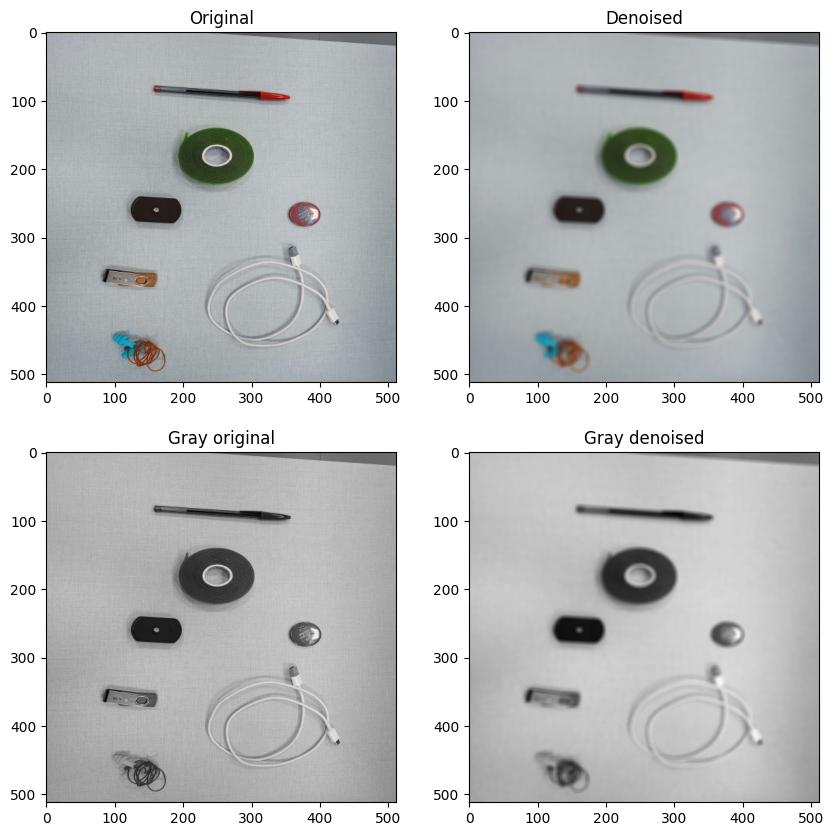

In [11]:
fig, axs = plt.subplots(2, 2,  figsize=(10, 10))
axs[0][0].imshow(img)
axs[0][0].set_title("Original")
axs[0][1].imshow(denoised)
axs[0][1].set_title("Denoised")
axs[1][0].imshow(gray, cmap="gray")
axs[1][0].set_title("Gray original")
axs[1][1].imshow(gray_denoised, cmap="gray")
axs[1][1].set_title("Gray denoised")


## Opencv simple segmentation

In [12]:
def cv_seg(img):
    # ret, thresh = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
    # ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_TRIANGLE)

    return thresh

In [13]:
cv_seg_img = cv_seg(gray)
cv_seg_denoised = cv_seg(gray_denoised)


In [14]:
cv_seg_img


array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ...,   0,   0, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ...,   0,   0, 255]], dtype=uint8)

Text(0.5, 1.0, 'Denoised')

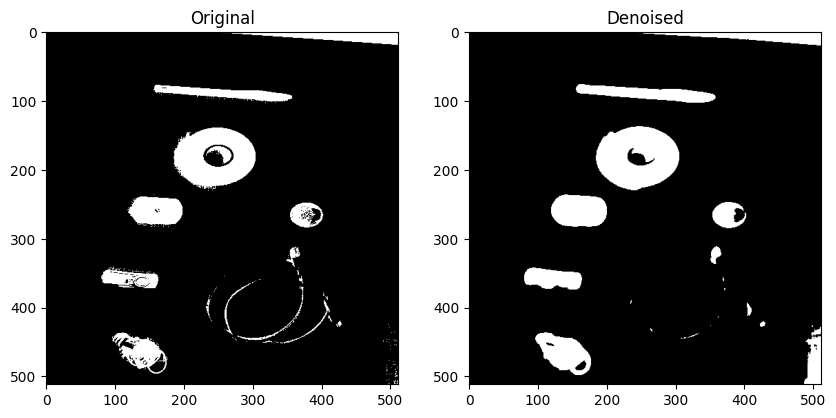

In [15]:
fig, axs = plt.subplots(1, 2,  figsize=(10, 10))
axs[0].imshow(cv_seg_img, cmap="gray_r")
axs[0].set_title("Original")
axs[1].imshow(cv_seg_denoised, cmap="gray_r")
axs[1].set_title("Denoised")

## Histogram based segmentation

tutorial video: <https://www.youtube.com/watch?v=kIVk0IhDMwY&ab_channel=DigitalSreeni>

In [16]:
from skimage import io
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float
from skimage import exposure   #Contains functions for hist. equalization


Text(0.5, 1.0, 'Denoised')

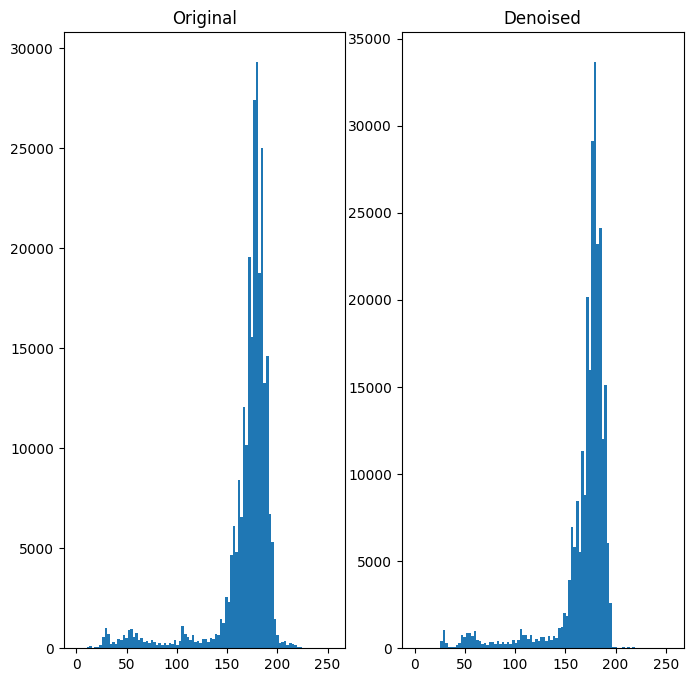

In [17]:
fig, axs = plt.subplots(1, 2,  figsize=(8, 8))

axs[0].hist(gray.flat, bins=100, range=(0,255))
axs[0].set_title("Original")
axs[1].hist(gray_denoised.flat, bins=100, range=(0,255))
axs[1].set_title("Denoised")


In [18]:
def hist_seg(img, threshold):
    img = exposure.equalize_adapthist(img)

    segm1 = (img <= threshold)
    segm2 = (img > threshold)

    #Construct a new empty image with same shape as original except with 3 layers.
    all_segments = np.zeros((img.shape[0], img.shape[1], 3)) #nothing but denoise img size but blank

    all_segments[segm1] = (1,1,1)
    all_segments[segm2] = (0,0,0)
    
    #We can use binary opening and closing operations. Open takes care of isolated pixels within the window
    #Closing takes care of isolated holes within the defined window

    from scipy import ndimage as nd

    segm1_opened = nd.binary_opening(segm1, np.ones((3,3)))
    segm1_closed = nd.binary_closing(segm1_opened, np.ones((3,3)))

    segm2_opened = nd.binary_opening(segm2, np.ones((3,3)))
    segm2_closed = nd.binary_closing(segm2_opened, np.ones((3,3)))

    all_segments_cleaned = np.zeros((img.shape[0], img.shape[1], 3)) #nothing but 714, 901, 3

    all_segments_cleaned[segm1_closed] = (1,1,1)
    all_segments_cleaned[segm2_closed] = (0,0,0)

    return all_segments_cleaned

In [19]:
# threshold = 145 for test images
hist_seg_img = hist_seg(gray, 130/255)
hist_seg_denoised = hist_seg(gray_denoised, 130/255)


Text(0.5, 1.0, 'Denoised')

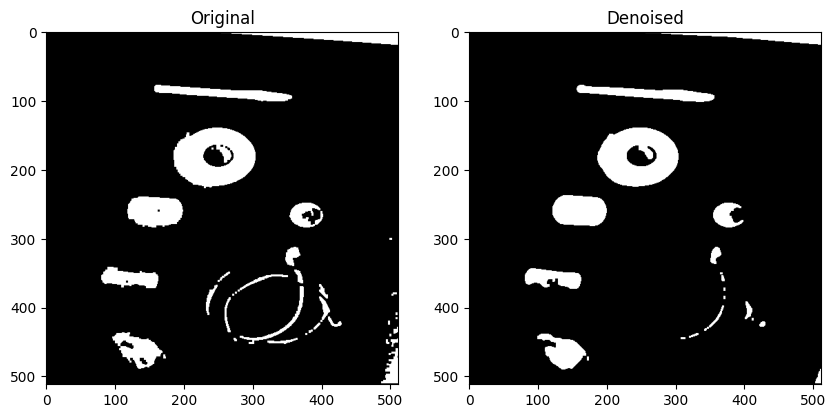

In [20]:
fig, axs = plt.subplots(1, 2,  figsize=(10, 10))

axs[0].imshow(hist_seg_img, cmap="gray")
axs[0].set_title("Original")
axs[1].imshow(hist_seg_denoised)
axs[1].set_title("Denoised")


## Random Walker Segmentation
Random Walker: <https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.random_walker>

In [21]:
from skimage.restoration import denoise_nl_means, estimate_sigma
import matplotlib.pyplot as plt
from skimage import io, img_as_float
import numpy as np

from skimage import exposure   #Contains functions for hist. equalization
from skimage.segmentation import random_walker

(array([2.2000e+01, 3.6000e+01, 4.0000e+01, 6.7000e+01, 1.3400e+02,
        1.3800e+02, 1.7300e+02, 2.0000e+02, 4.2800e+02, 5.4900e+02,
        7.7800e+02, 8.0400e+02, 7.2400e+02, 4.4000e+02, 4.7700e+02,
        4.7600e+02, 4.4400e+02, 5.1100e+02, 4.6300e+02, 4.7700e+02,
        4.7200e+02, 4.9800e+02, 4.6800e+02, 5.0000e+02, 4.7000e+02,
        4.3800e+02, 4.3200e+02, 3.9200e+02, 4.2400e+02, 4.2800e+02,
        3.8900e+02, 5.0300e+02, 5.2400e+02, 6.2900e+02, 7.2000e+02,
        8.8600e+02, 7.1800e+02, 6.2800e+02, 6.7300e+02, 5.5300e+02,
        5.7400e+02, 6.2500e+02, 6.0600e+02, 7.0700e+02, 7.3400e+02,
        8.2300e+02, 8.5900e+02, 9.7800e+02, 1.0470e+03, 1.3190e+03,
        1.5800e+03, 1.7540e+03, 1.9520e+03, 2.2690e+03, 2.5910e+03,
        2.9190e+03, 3.3200e+03, 3.7950e+03, 4.2570e+03, 5.0690e+03,
        5.7520e+03, 6.8650e+03, 7.9340e+03, 8.9150e+03, 1.0126e+04,
        1.0979e+04, 1.1980e+04, 1.2654e+04, 1.3250e+04, 1.3466e+04,
        1.3340e+04, 1.3046e+04, 1.2466e+04, 1.13

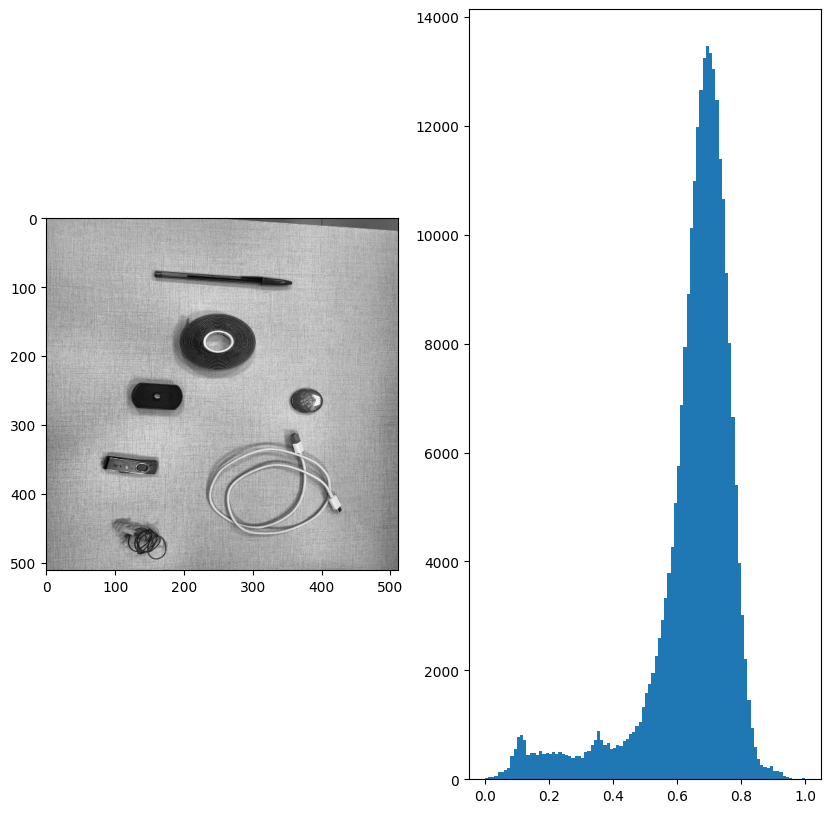

In [22]:
eq_img = exposure.equalize_adapthist(gray)
fig, (ax1, ax2) = plt.subplots(1, 2,  figsize=(10, 10))
ax1.imshow(eq_img, cmap='gray')
ax2.hist(eq_img.flat, bins=100, range=(0, 1))

In [23]:
markers = np.zeros(eq_img.shape, dtype=np.uint)

markers[(eq_img <= 0.33)] = 1
markers[(eq_img > 0.33)] = 0

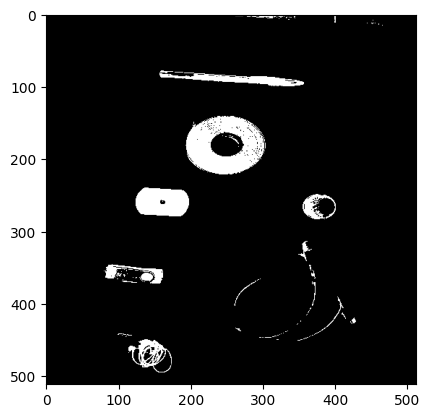

In [24]:
# Run random walker algorithm
# https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.random_walker
labels = random_walker(eq_img, markers, beta=10, mode='bf')
# plt.imsave("images/markers.jpg", markers)
segm1 = (labels == 0)
segm2 = (labels == 1)
all_segments = np.zeros((eq_img.shape[0], eq_img.shape[1], 3)) #nothing but denoise img size but blank

all_segments[segm1] = (0,0,0)
all_segments[segm2] = (1,1,1)
plt.imshow(all_segments)

In [25]:
def rand_walk_seg(img, thresh):
    eq_img = exposure.equalize_adapthist(img)
    markers = np.zeros(eq_img.shape, dtype=np.uint)
    markers[(eq_img <= thresh)] = 1
    markers[(eq_img > thresh)] = 0

    # Run random walker algorithm
    # https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.random_walker
    labels = random_walker(eq_img, markers, beta=10, mode='bf')
    segm1 = (labels == 0)
    segm2 = (labels == 1)
    all_segments = np.zeros((eq_img.shape[0], eq_img.shape[1], 3)) #nothing but denoise img size but blank

    all_segments[segm1] = (0,0,0)
    all_segments[segm2] = (1,1,1)
    return all_segments

In [26]:
# threshold = 0,33 for test images
rand_walk_img = rand_walk_seg(gray, 0.33)
rand_walk_denoised = rand_walk_seg(gray_denoised, 0.33)

Text(0.5, 1.0, 'Denoised')

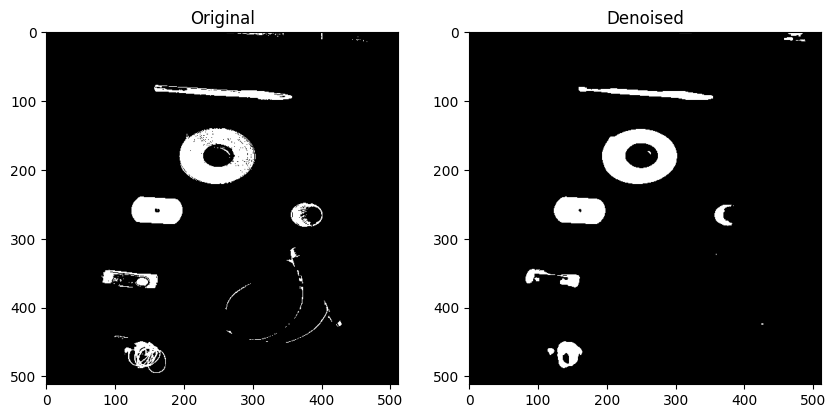

In [27]:
fig, axs = plt.subplots(1, 2,  figsize=(10, 10))

axs[0].imshow(rand_walk_img)
axs[0].set_title("Original")
axs[1].imshow(rand_walk_denoised)
axs[1].set_title("Denoised")

## Background remover

In [28]:
from rembg import remove

rnd = np.random.rand(img.shape[0],img.shape[1]) * 255 
_ = remove(rnd)

Text(0.5, 1.0, 'Denoised')

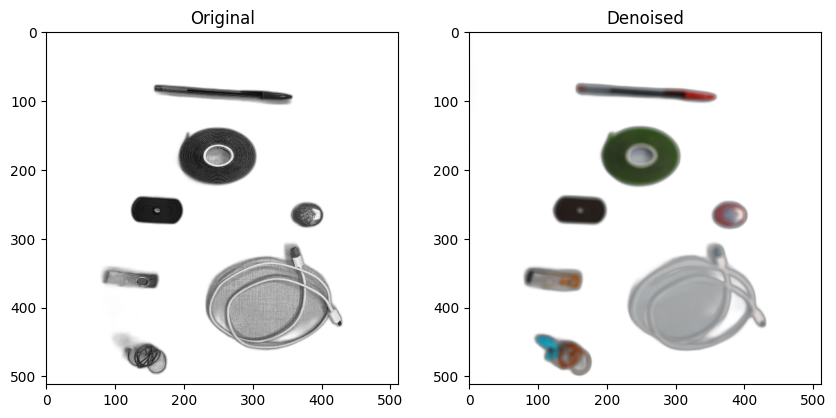

In [29]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(gray)

output = remove(cl1)
denoised_output = remove(denoised)

fig, axs = plt.subplots(1, 2,  figsize=(10, 10))

axs[0].imshow(output)
axs[0].set_title("Original")
axs[1].imshow(denoised_output)
axs[1].set_title("Denoised")

In [30]:
# gray_output = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
output.max()

255

In [31]:
def bin_img(img):
    aux = np.ones((512, 512),dtype=np.uint)
    aux[(img[:,:,3] <= 10)] = 0

    return aux

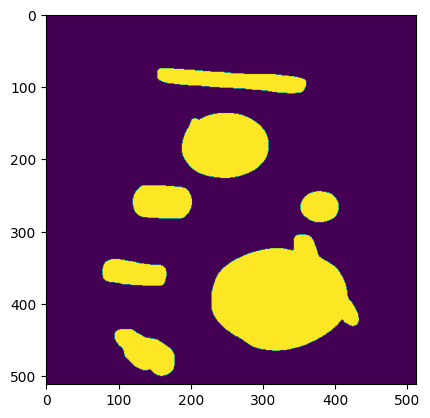

In [32]:
bina = bin_img(denoise(output))
plt.imshow(bina)

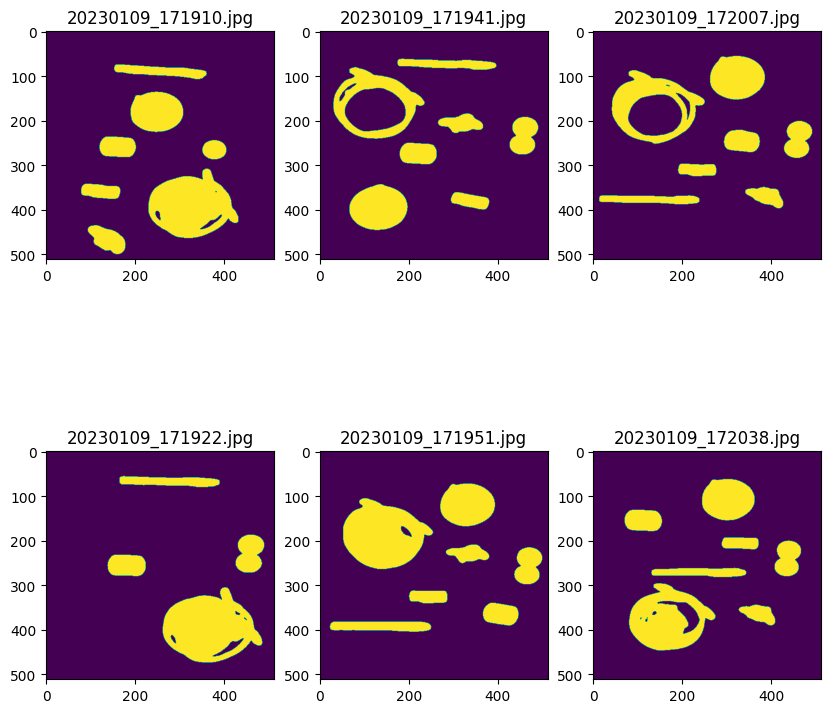

In [33]:
bin_images = []

for image in images:
    bin_images.append(bin_img(denoise(remove(image))))

show(bin_images)

## Morphological operations

**Dilation**: enlarges bright regions and shrink dark regions  
**Erosion**: shrinks bright regions and enlarges dark regions

**closing**: Dilation -> Erosion  
**opening**: Erosion -> Dilation

In [34]:
from skimage.feature import blob_log
from skimage.io import imread, imshow
from math import sqrt
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import rectangle
from skimage.measure import label, regionprops

(array([2.12491e+05, 4.36300e+03, 1.29700e+03, 5.62000e+02, 3.73000e+02,
        3.75000e+02, 2.84000e+02, 2.58000e+02, 2.64000e+02, 2.24000e+02,
        2.31000e+02, 2.00000e+02, 2.92000e+02, 2.39000e+02, 2.28000e+02,
        2.08000e+02, 2.22000e+02, 2.31000e+02, 2.20000e+02, 2.09000e+02,
        2.08000e+02, 2.34000e+02, 2.76000e+02, 2.48000e+02, 3.65000e+02,
        3.47000e+02, 3.86000e+02, 3.89000e+02, 4.17000e+02, 4.62000e+02,
        4.60000e+02, 4.36000e+02, 3.89000e+02, 4.12000e+02, 3.91000e+02,
        3.13000e+02, 3.21000e+02, 2.60000e+02, 3.35000e+02, 3.04000e+02,
        3.22000e+02, 2.78000e+02, 3.09000e+02, 2.94000e+02, 2.85000e+02,
        3.44000e+02, 3.27000e+02, 2.98000e+02, 2.90000e+02, 2.94000e+02,
        3.45000e+02, 2.59000e+02, 3.15000e+02, 2.94000e+02, 3.03000e+02,
        3.38000e+02, 3.34000e+02, 2.70000e+02, 3.00000e+02, 2.92000e+02,
        2.66000e+02, 2.87000e+02, 2.77000e+02, 2.68000e+02, 2.72000e+02,
        2.68000e+02, 2.64000e+02, 2.54000e+02, 2.61

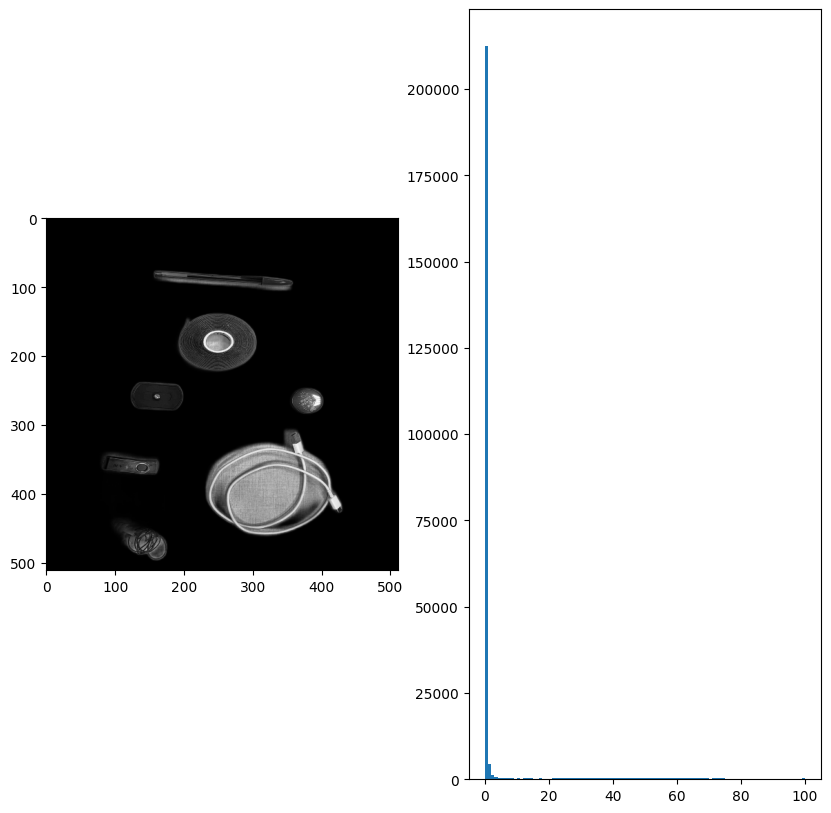

In [35]:
gray_output = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
fig, axs = plt.subplots(1, 2,  figsize=(10, 10))
axs[0].imshow(gray_output, cmap="gray")
axs[1].hist(gray_output.flat, bins=100, range=(0,100))


In [36]:
def multi_dil(im,num):
    for i in range(num):
        im = dilation(im)
    return im
    
def multi_ero(im,num):
    for i in range(num):
        im = erosion(im, rectangle(2, 7))
    return im

Text(0.5, 1.0, '10 dilations')

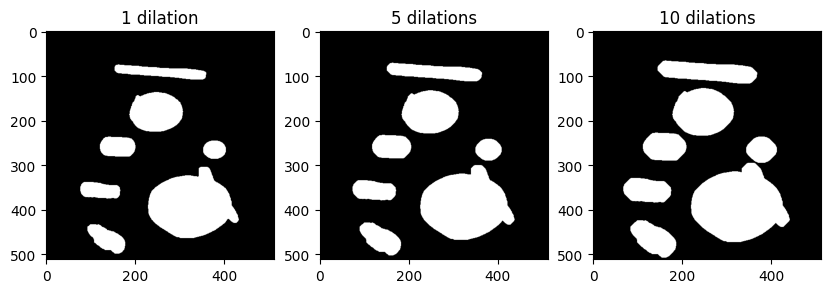

In [37]:
cv_seg_img = cv_seg(gray_output)
dilated = multi_dil(cv_seg_img, 1)
dilated_5 = multi_dil(cv_seg_img, 5)
dilated_10 = multi_dil(cv_seg_img, 10)

fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(dilated, cmap="gray")
axs[0].set_title("1 dilation")

axs[1].imshow(dilated_5, cmap="gray")
axs[1].set_title("5 dilations")

axs[2].imshow(dilated_10, cmap="gray")
axs[2].set_title("10 dilations")

Text(0.5, 1.0, '10 erosions')

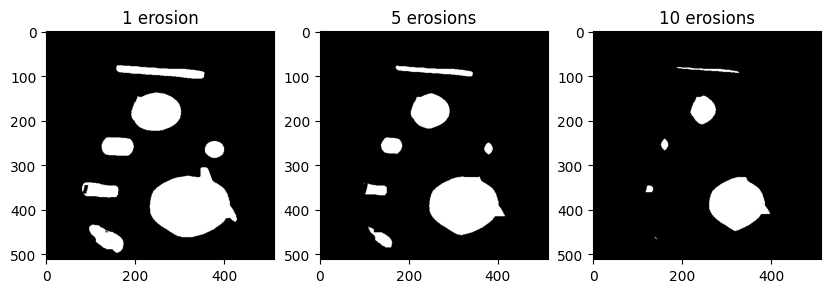

In [38]:
eroded = multi_ero(cv_seg_img, 1)
eroded_5 = multi_ero(cv_seg_img, 5)
eroded_10 = multi_ero(cv_seg_img, 10)

fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(eroded, cmap="gray")
axs[0].set_title("1 erosion")

axs[1].imshow(eroded_5, cmap="gray")
axs[1].set_title("5 erosions")

axs[2].imshow(eroded_10, cmap="gray")
axs[2].set_title("10 erosions")

Text(0.5, 1.0, 'Closing')

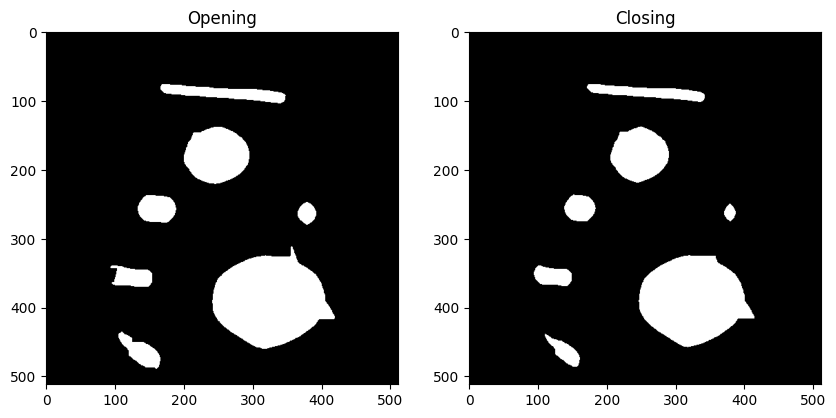

In [39]:
opened = multi_dil(multi_ero(cv_seg_img, 4), 1)
closed = multi_ero(multi_dil(cv_seg_img, 2), 6)

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(opened, cmap="gray")
axs[0].set_title("Opening")

axs[1].imshow(closed, cmap="gray")
axs[1].set_title("Closing")

## Object counting

1.0


Text(0.5, 1.0, 'Random Walker')

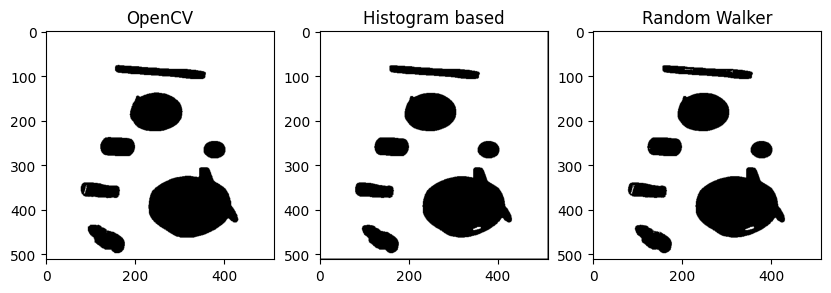

In [40]:
cv_seg_img = cv_seg(gray_output)
hist_seg_img = hist_seg(gray_output, 10/255)
rand_walk_img = rand_walk_seg(gray_output, 10/255)

print(rand_walk_img.max())

# hist_seg_img = np.where((hist_seg_img==1.), 0, 1)
# rev_hist_seg_img = np.zeros(gray_output.shape, dtype=np.uint)
# rev_hist_seg_img = hist_seg_img[hist_seg_img == 0] = 1
# rev_hist_seg_img = hist_seg_img[hist_seg_img == 0] = 1


fix, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(cv_seg_img, cmap="gray_r")
axs[1].imshow(hist_seg_img, cmap="gray_r")
axs[2].imshow(rand_walk_img, cmap="gray_r")

axs[0].set_title("OpenCV")
axs[1].set_title("Histogram based")
axs[2].set_title("Random Walker")


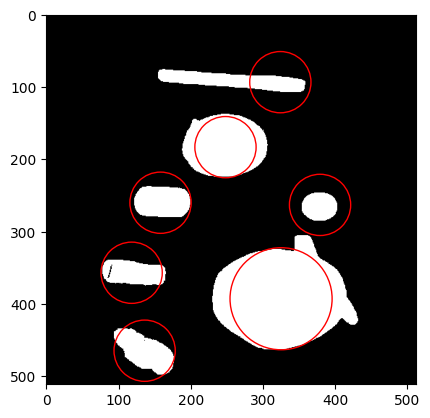

In [41]:
blobs = blob_log(cv_seg_img, max_sigma=50, min_sigma = 30, num_sigma=3, threshold=0.2, overlap = 0.1)
fig, ax = plt.subplots()
ax.imshow(cv_seg_img, cmap='gray')
for blob in blobs:
    y, x, area = blob
    ax.add_patch(plt.Circle((x, y), area*np.sqrt(2), color='r', 
                            fill=False))

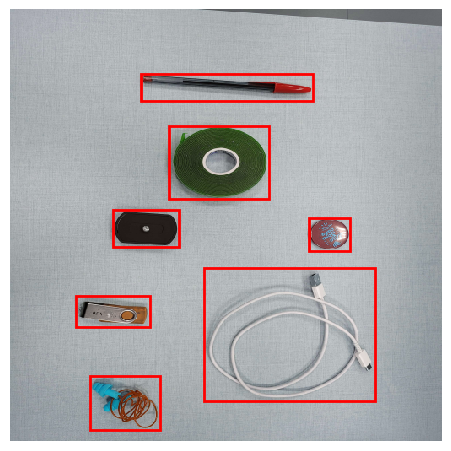

In [42]:
# im_cleaned = multi_dil(multi_ero(cv_seg_img, 6), 6)
# im_cleaned = multi_ero(multi_dil(cv_seg_img, 3), 6)
im_cleaned = cv_seg_img

label_im = label(im_cleaned)
fig, ax = plt.subplots(figsize=(5, 5))
imshow(img)

for i in regionprops(label_im):
    minr, minc, maxr, maxc = i.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    ax.set_axis_off()
    
plt.show()

##### number os blobs (objects) detected

In [43]:
len(regionprops(label_im))

7

## Tests


In [44]:
def count_1(img):
    rembg_img = remove(img)
    denoised = denoise(rembg_img)
    gray = cv2.cvtColor(denoised, cv2.COLOR_BGR2GRAY)
    segmented = cv_seg(gray)
    # dilated = multi_dil(segmented, 3)
    label_im = label(segmented)
    boxes = []
    for i in regionprops(label_im):
        minr, minc, maxr, maxc = i.bbox
        # aux = cv2.rectangle(aux, (minc, minr), (maxc, maxr), (255,0,0), 2)
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=1)
        boxes.append(rect)
    return boxes
    

In [45]:
objects = []

for image in images:
    objects.append(count_1(image))
    

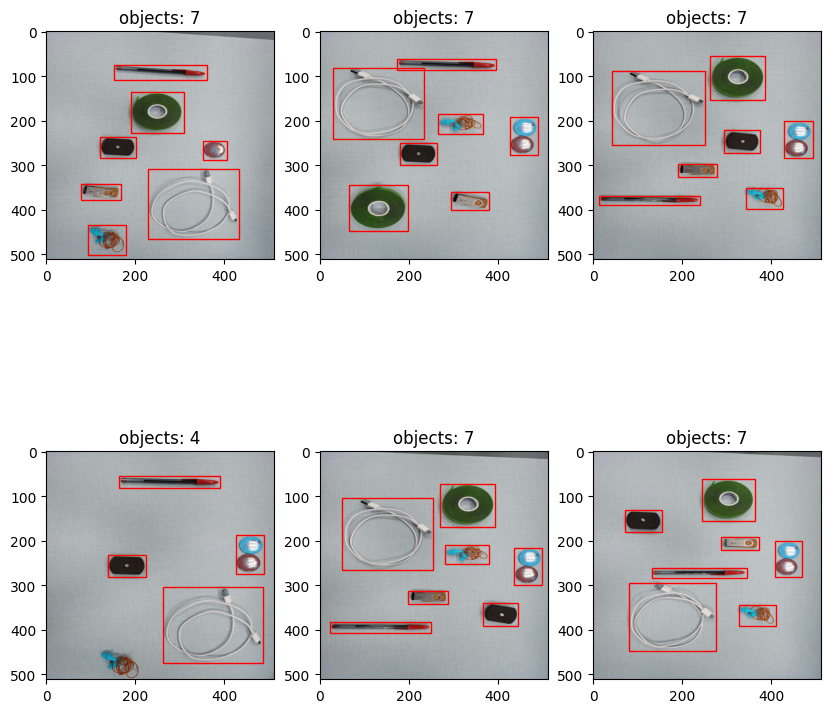

In [46]:
cols = round(len(images)/2)
fig, axs = plt.subplots(2, cols,figsize=(10, 10))

for i in range(2):
    for j in range(cols):
        img = images[2 * j + i]
        boxes = objects[2 * j + i]
        axs[i][j].imshow(img)
        axs[i][j].set_title(f"objects: {len(boxes)}")
        for box in boxes:
            axs[i][j].add_patch(box)
        ax.set_axis_off()

plt.show()


In [47]:
def count_2(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cl1 = clahe.apply(gray)
    rembg_img = remove(cl1)
    binarized = bin_img(denoise(rembg_img))
    # dilated = multi_dil(binarized, 4)    
    label_im = label(binarized)
    boxes = []
    for i in regionprops(label_im):
        minr, minc, maxr, maxc = i.bbox
        # aux = cv2.rectangle(aux, (minc, minr), (maxc, maxr), (255,0,0), 2)
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=1)
        boxes.append(rect)
    return boxes

In [48]:
objects_2 = []

for image in images:
    objects_2.append(count_2(image))

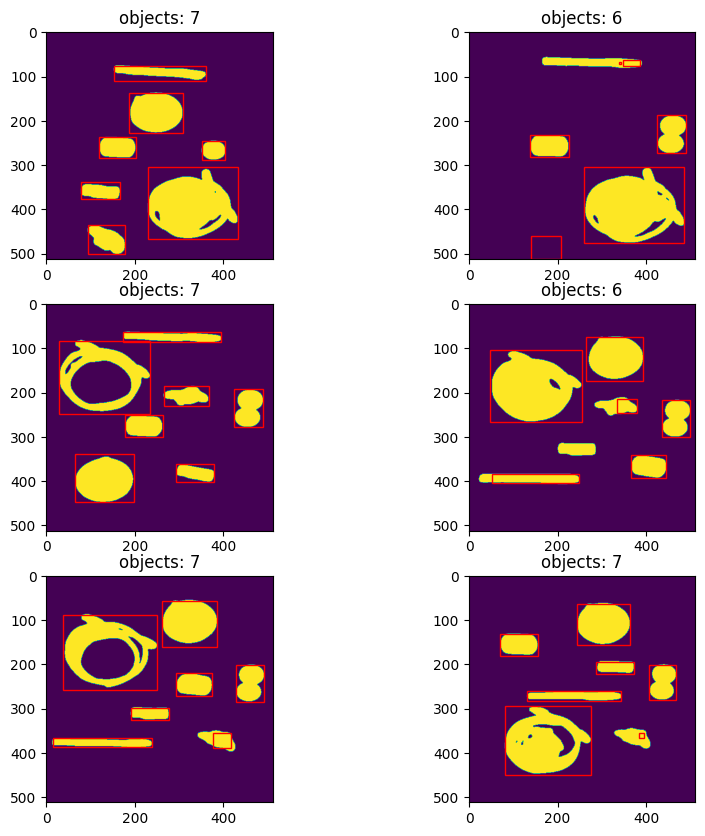

In [49]:
rows = round(len(images)/2)
fig, axs = plt.subplots(rows, 2,figsize=(10, 10))

for i in range(rows):
    for j in range(2):
        img = bin_images[2 * i + j]
        boxes = objects_2[2 * i + j]
        axs[i][j].imshow(img)
        axs[i][j].set_title(f"objects: {len(boxes)}")
        for box in boxes:
            axs[i][j].add_patch(box)

# axs.set_axis_off()

plt.show()